#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Procesamiento de Lenguaje Natural (NLP)**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad Semanas 03 y 04**

###**Pre-procesamiento, Matrices Documeto-Término (DTM) y TF-IDF.**

En esta actividad deberás utilizar los datos de tres archivos que se encuentran en Canvas:

*   **amazon_cells_labelled.txt** Contiene 1000 registros de comentarios de usuarios que adquirieron un producto a través de la plataforma de Amazon.

*   **imdb_labelled.txt** Contiene 1000 registros de comentarios que dejaron usuarios sobre palículas y series en la plataforma de IMBD.

*   **yelp_labelled.txt** Contiene 1000 comentarios de usuarios sobre servicios de comida dejados en l aplataforma de Yelp.

Igualmente son los archivos que encuentras en el Machine Learning Repository de la UCI, llamado "Sentiment Labelled Sentences": https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#



In [4]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords

import re
import string

In [2]:
nltk.download('punkt')    # es un tokenizador que ayuda a dividr el texto en enunciados mediante un modelo no-supervisado.
nltk.download('stopwords')    # para tener acceso a "stopwords" en varios idiomas.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Veamos la lista de stopwords que se incluyen de manera predeterminada la suite de librerías de NLTK:

print(len(stopwords.words('english')))
print(stopwords.words('english'))

198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 

In [5]:
# Consideremos la siguiente lista de palabras asociada a negaciones en inglés:

negwords = [ 'no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

##**Pregunta - 1:**




Excluye todas las palabras de la lista "negwords" de la lista predeterminada de "stopwords", para definir un nuevo conjunto llamado **mystopwords**, con el cual trabajaremos en esta Actividad:


In [6]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords

# Asegúrate de descargar las stopwords si aún no lo has hecho
nltk.download('stopwords')

# Obtén la lista de stopwords en inglés
default_stopwords = set(stopwords.words('english'))

# Lista de palabras asociadas a la negación
negwords = [
    'no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't",
    'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't",
    'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
    'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't",
    'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't",
    'wouldn', "wouldn't"
]

# Convierto negwords a un conjunto para facilidad de uso
negwords_set = set(negwords)

# Crea mystopwords excluyendo negwords de default_stopwords
mystopwords = default_stopwords - negwords_set

# Resultados
print(f"Total de 'mystopwords': {len(mystopwords)}")
print("mystopwords:")
print(mystopwords)

Total de 'mystopwords': 158
mystopwords:
{'its', "he'll", 'has', "he's", "he'd", 'against', 'again', 'into', 'during', "you'd", 'we', 'been', 'below', 'further', "she'd", 'themselves', "i'll", 'o', 'me', "they're", 'off', "they'll", 'who', 'them', 'other', 'above', 'are', 'ours', 'when', 'y', 'here', 'only', "we're", 'there', 'i', 'ourselves', 'what', 'on', 'few', 'all', 'those', 'have', 'with', 'because', 'most', 'himself', "they've", "we've", 'over', "you've", 's', 'do', 'how', 'out', 'just', 'of', 'same', 'as', 'both', 'm', "she's", 'more', 'which', 'why', "you'll", 'from', 'his', 'once', 'am', 'll', 'or', 'she', 'whom', 'is', 'but', 'and', 'by', 'their', 'before', 'then', 'yourselves', 'such', 'while', 'between', 'each', 'having', 've', 'can', 'our', 'hers', 'about', 'him', 'yourself', "you're", 'itself', 'your', 'at', "it'll", 'my', 'so', 'herself', 'was', 'some', "i've", "i'd", "they'd", 'that', "i'm", 'after', 't', 'through', 'too', 'a', 'for', 'to', 'very', "should've", 'the', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###**Cargamos los datos de Amazon**

In [11]:
# Puedes modificar en dado caso la ruta de los archivos:

dfa = pd.read_csv('amazon_cells_labelled.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')
dfi = pd.read_csv('imdb_labelled.txt', delimiter='\t', names=['review','label'], header=None, encoding='utf-8')
dfy = pd.read_csv('yelp_labelled.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')


print('Total de registros de Amazon:',dfa.shape)
print('Total de registros de IMBD:',dfi.shape)
print('Total de registros de Yelp:',dfy.shape)

Total de registros de Amazon: (1000, 2)
Total de registros de IMBD: (748, 2)
Total de registros de Yelp: (1, 2)


La salida anterior esperada es la siguiente:

Total de registros de Amazon: (1000, 2)

Total de registros de IMBD: (748, 2)

Total de registros de Yelp: (1000, 2)

In [9]:
dfa.head()     # Cada uno de estos data frame está formado de dos columnas,
               # uno con los comentarios (review) y otro con la etiqueta (label).
               # En particular aquí mostramos en el Amazon:

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


Sin embargo, observa que los registros de IMBD no son los 1000 que se indican en la documentación de estos datos, sino 748.

En realidad no son datos perdidos, sino que varios de ellos fueron capturados errónamente como uno solo. En ocasiones, la gran cantidad de caracteres especiales existentes en la actualidad generan este tipo de problemas.

Por ejemplo, observa la salida siguiente y cómo el registro de índice 19 tiene una gran cantidad de registros conjuntados como uno solo. Es decir, se conjuntó indebidamente información de las dos columnas del data frame.



In [10]:
dfi.values.tolist()[17:21]

[["I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
  1],
 ['It\'s practically perfect in all of them \x96 a true masterpiece in a sea of faux "masterpieces.  ',
  1],
 [' The structure of this film is easily the most tightly constructed in the history of cinema.  \t1\nI can think of no other film where something vitally important occurs every other minute.  \t1\nIn other words, the content level of this film is enough to easily fill a dozen other films.  \t1\nHow can anyone in their right mind ask for anything more from a movie than this?  \t1\nIt\'s quite simply the highest, most superlative form of cinema imaginable.  \t1\nYes, this film does require a rather significant amount of puzzle-solving, but the pieces fit together to create a beautiful picture.  \t1\nThis short film certainly pulls no punches.  \t0\nGraphics is far from the best part of the game.  \t0\nThis is

Además, se observa que cada comentario (review) debe estar separado de su evaluación (label) por un tabulador "\t" y después separado del siguiente registro por un salto de línea "\n".

Usaremos esta información para separar de manera adecuada estos registros del conjunto de IMBD.

##**Pregunta - 2:**

En este ejercicio deberás corregir este problema que tienen los comentarios de IMBD, del cual se registran 748 comentarios, cuando deben ser 1000.

Como cada data frame tiene 2 columnas, el comentario y la evaluación, en algunas ocasiones el valor numérico de la evaluación se toma como parte del comentario y esto empieza a generar dichos errores.

El problema se puede intentar resolver de varias formas, sin embargo puedes al menos seguir los siguientes pasos para obtener de nuevo los 1000 comentarios en IMBD:


1.   Conjuntar en un solo string cada comentario (review) con su evaluación (label), separados por un tabulador "\t". Toma en cuenta que ambos deben ser del tipo de dato string.

2.   Separa cada uno de estos string con el método split() y con respecto al salto de línea "\n". Esto te debe llevar a que cada registro es ahora una lista con un solo string que contiene el comenario (review), seguido del tabulador y de la etiqueta (label). O bien, tienes una lista de varios string, donde cada string es un review, seguido por el tabulador y su label.

3.   Ahora separa cada cada uno de los string del paso anterior con respecto al tabulador "\t", para ya tener separados ahora sí, todos los comentarios (review) de su evaluación (label).

4.   Agrega cada uno de estos nuevos comentarios (review) y etiquetas (label) a la nueva lista que llamamos "newdfi".

El número de elementos de la nueva lista "newdfi" debe de ser de 1000, donde cada elemento está formado a su vez por una lista de dos elementos, donde el primero es un string del comentario (review) y el segundo es un número entero de la etiqueta (label).

Básicamente la idea fue conjuntar de nuevo la información de ambas columnas, para separarlas de nuevo de la manera adecuada.






In [12]:
# Supongamos que 'dfi' ya ha sido definido con los datos originales.
# dfi = pd.read_csv('ruta/a/imdb.csv')  # Cargar el DataFrame desde el archivo CSV.

tmpdfi = dfi.values.tolist()  # Lista con los 748 registros.
newdfi = []  # Lista de salida que deberá tener los 1000 registros ya debidamente separados.

################################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 2:

# Para cada fila en tmpdfi, concatenamos el comentario y su etiqueta
combined_reviews = []
for row in tmpdfi:
    # Concatenamos el comentario con su etiqueta
    combined_reviews.append(str(row[0]) + "\t" + str(row[1]))

# Convertimos la lista de strings en un solo string, separado por saltos de línea
combined_string = "\n".join(combined_reviews)

# Separamos cada registro por el salto de línea
split_reviews = combined_string.split("\n")

# Creamos la nueva lista que contendrá los reviews y las labels como listas
for item in split_reviews:
    # Separamos comentarios de etiquetas utilizando el tabulador
    review_label = item.split("\t")
    # Aseguramos que haya exactamente 2 elementos (comentario y etiqueta)
    if len(review_label) == 2:
        review = review_label[0]
        label = int(review_label[1])  # Convertimos la etiqueta a entero
        newdfi.append([review, label])

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
################################################################################

# Verificamos que la nueva lista tenga 1000 elementos
print('La nueva lista tiene 1000 elementos:', (len(newdfi) == 1000))

La nueva lista tiene 1000 elementos: True


In [13]:
# Verificando los registros donde habíamos detectado uno de los problemas:
newdfi[17:21]

[["I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
  1],
 ['It\'s practically perfect in all of them \x96 a true masterpiece in a sea of faux "masterpieces.  ',
  1],
 [' The structure of this film is easily the most tightly constructed in the history of cinema.  ',
  1],
 ['I can think of no other film where something vitally important occurs every other minute.  ',
  1]]

En particular la salida anterior debe ser algo como lo siguiente:

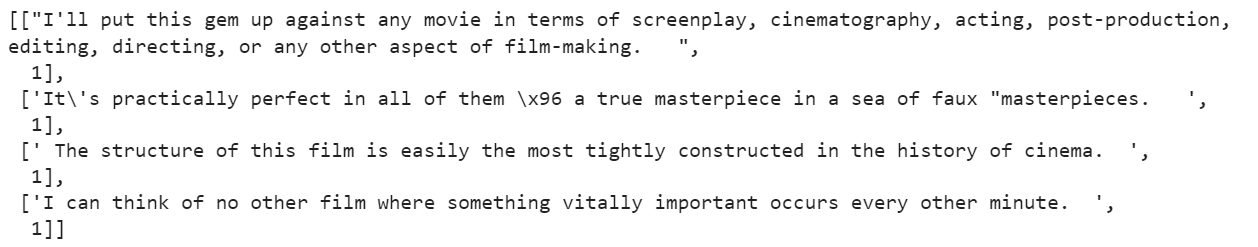

Transformemos en data frame la lista recién generada de los comentarios (review) y evaluaciones (label) del conjunto de evaluaciones de películas IMBD:

In [14]:
dfii = pd.DataFrame(newdfi, columns=['review','label'])

dfii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [15]:
# y concatenamos los tres conjuntos para tener finalmente los 3000 registros:

df = pd.concat([dfa, dfii, dfy], ignore_index=True)   # Tienes que usar el "ignore_index", de lo contrario reincia cada
                                                      # vez de 0 a 999 los índices.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   review  2000 non-null   object 
 1   label   2000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.4+ KB


La salida esperada anterior debe ser semajante a los siguiente:

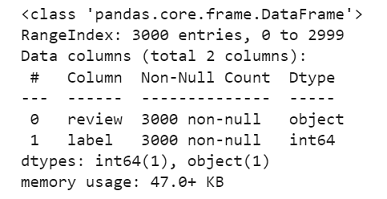

In [16]:
df['label'].value_counts()   # Recordemos que tenemos un 50% de comentarios positivos y de negativos.

,count
label,
0.0,1000
1.0,1000


In [17]:
df.head()

,review,label
0,So there is no way for me to plug it in here i...,0.0
1,"Good case, Excellent value.",1.0
2,Great for the jawbone.,1.0
3,Tied to charger for conversations lasting more...,0.0
4,The mic is great.,1.0


##**Pregunta - 3:**

Sabemos que existen comentarios muy diversos. Por ejemplo, observa los registros 1125 y 1788, cuyas salidas deben de ser 10/10. De los 3000, dos de los comentarios fueron simplemente de esta forma.

Cuando apliques el proceso de limpieza en la pregunta 4, como solo consideraremos caracteres alfabéticos, estos dos registros quedarán vacíos.

En particular ¿cómo tratarías estos dos comentarios? ¿Simplemente los descartarías? ¿Los incluirías haciendo algún ajuste particular? ¿Alguna otra decisión que consideres adecuada para estos dos casos?

**Incluye a continuación tus comentarios sobre la decisión que tomarías para el tratamiento en particular de estos dos registros, 1125 y 1788. Justifica tu respuesta.**

In [18]:
df.iloc[1788,:]   # verificando tu salida

,1788
review,10/10
label,1.0


########################################################
##### **AGREGA AQUÍ TUS COMENTARIOS - Pregunta 3:**


Sabemos que existen comentarios muy diversos. Por ejemplo, he observado que los registros 1125 y 1788 contienen simplemente la calificación "10/10". Al aplicar el proceso de limpieza planeado, donde solo consideraremos caracteres alfabéticos, estos registros quedarán vacíos.

En particular, aquí están las posibles decisiones sobre cómo tratar estos dos comentarios:

Descartar Registros:

Justificación: Si sólo se desea trabajar con comentarios que ofrezcan información descriptiva o cualitativa, puede ser razonable descartar estos registros. Esto es especialmente cierto si el conjunto de datos es grande y la proporción de registros eliminados no afecta significativamente los resultados del análisis.
Desventaja: Se perdería información potencial, ya que estos registros podrían haber sido útiles para entender la percepción general hacia una película, aunque su contenido sea escaso.
Incluir Registros con Ajustes:

Justificación: En lugar de descartar completamente estos registros, se podría optar por mantenerlos, haciendo un ajuste especial, como transformar "10/10" en "Calificación perfecta" o "Valoración muy alta". Esto ayudaría a preservar la información en análisis de frecuencia o de sentimientos.
Desventaja: Este enfoque puede introducir sesgo en el análisis si estas descripciones estándar no reflejan lo que el usuario realmente quiso expresar.
Marcar los Registros:

Justificación: Se podrían registrar pero marcar como sin texto válido. Esto implicaría crear una nueva columna para indicar que estos registros tienen un mensaje vacío o que son comentarios sin contenido, y así considerar estos casos de forma diferente en el análisis posterior.
Desventaja: Esto agregarían complejidad al análisis, ya que sería necesario definir cómo tratar estos registros más adelante.
Mantenerlos sin Cambios:

Justificación: Otra opción sería mantener estos registros en su forma original en el DataFrame, pero hacer un seguimiento de ellos en un conjunto separado para considerar su influencia más adelante si se desea analizar el impacto de las calificaciones.
Desventaja: Podría ser complicado manejar múltiples conjuntos de datos o registros durante el análisis.
Conclusión y Recomendación
La decisión de cómo tratar estos registros debe equilibrar la integridad del conjunto de datos con los objetivos del análisis posterior. Si la calidad de los comentarios es una prioridad, o si se espera realizar un análisis en profundidad del contenido, puede ser mejor descartarlos. Sin embargo, si se desea incluir la opinión del usuario, aunque sea mínima, recomendaría usar una opción de ajuste. Por ejemplo, reemplazar "10/10" por "Excelente" podría ser una buena solución, ya que permite mantener una representación de la opinión del usuario sin perder la validez del análisis.



##### **FIN PARA AGREGAR TUS COMENTARIOS**
#########################################################

In [20]:

# Separamos la información:
# La "X" serán los datos de entrada, los comentarios.
# La "Y" será la variable de salida, la evaluación.

X = dfii['review']    # Serie de strings
Y = dfii['label']     # Serie de enteros 0s y 1s

# Verificación de las dimensiones esperadas
assert X.shape == (1000,)  # Confirmar que tenemos la dimensión de X esperada
assert Y.shape == (1000,)  # Confirmar que tenemos la dimensión de Y esperada

# Imprimir las formas para verificación
print("Forma de X (comentarios):", X.shape)
print("Forma de Y (etiquetas):", Y.shape)


Forma de X (comentarios): (1000,)
Forma de Y (etiquetas): (1000,)


##**Pregunta - 4:**

**En esta etapa deberás llevar a cabo el procesamiento, limpieza y tokenización de los comentarios de texto.**

Deberás de incluir los procesos que se indicarán a continuación, aunque no necesariament deben ser en este orden. De hecho deberás estar revisando la salida de algunos de los registros para que determines cual consideras podría ser el mejor orden de estos pasos.

La incluiremos en una función llamada "clean_tok()" ya que es la tokenización y limpieza básica de cada uno de los 3000 comentarios. La entrada de esta función son cada uno de estos 3000 strings/comentarios.

Lo que nos regresa "clean_tok()" es una lista de tokens/strings ya simplificados de cada comentario de entrada.

Los pasos a incluir son los siguientes (repito, tú deberás determinar el orden de ellos, aquí se incluyen en orden alfabético):

*   **Caracteres alfabéticos:** Solo considerar caracteres alfabéticos. Por lo tanto, deberán ser eliminados signos de puntuación, caracteres especiales y números.

*   **Longitud mayor a 1:** Se deben considerar solamente tokens de longitud mayor a 1.

*   **Minúsculas:** Simplificar todo a minúsculas.

*   **Stopwords:** Eliminar las stopwords.

*   **Tokenización:** Cada comentario queda tokenizado por palabras, o cadena de caracteres alfabéticos.

Por ejemplo, si el primer comentario de X fuera el string 'All you need is love!', lo que nos regresaría clean_tok() sería la lista de strings ['need', 'love'] que llamaremos "tokens".

In [23]:
import re
import string
import nltk
from nltk.corpus import stopwords



def clean_tok(doc):
    ##############################################################################
    # AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 4:

    # 1. Convertir a minúsculas
    doc = doc.lower()

    # 2. Eliminar caracteres especiales y números, manteniendo solo caracteres alfabéticos
    doc = re.sub(r'[^a-zA-Z\s]', '', doc)

    # 3. Tokenizar el comentario
    tokens = doc.split()

    # 4. Eliminar las stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Eliminar tokens de longitud 1 (si no hay información útil en ellos)
    tokens = [word for word in tokens if len(word) > 1]

    # FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
    ##############################################################################

    return tokens

In [24]:
# Aplicamos el proceso de limpieza y tokenización:

Xcleantok = [clean_tok(x) for x in X]

Veamos los primeros comentarios.

En particular observa si "minutes" y "major" están como dos tokens separados en el cuarto comentario. De nos ser así, si aparecen juntos como un solo token, debes revisar tu proceso de limpieza anterior, porque esto significa que pueden existir otros muchos casos que nos llevan a esta salida no deseada. Trata de determinar el origen de este problema (y solo en caso de que te haya aparecido como un solo token "minutesmajor", en el cuarto comentario).


In [25]:
for x in Xcleantok[0:5]:
  print(x)

['slowmoving', 'aimless', 'movie', 'distressed', 'drifting', 'young', 'man']
['sure', 'lost', 'flat', 'characters', 'audience', 'nearly', 'half', 'walked']
['attempting', 'artiness', 'black', 'white', 'clever', 'camera', 'angles', 'movie', 'disappointed', 'became', 'even', 'ridiculous', 'acting', 'poor', 'plot', 'lines', 'almost', 'nonexistent']
['little', 'music', 'anything', 'speak']
['best', 'scene', 'movie', 'gerardo', 'trying', 'find', 'song', 'keeps', 'running', 'head']


##**Pregunta - 5:**

Esta pregunta es abierta y podrás incluir todos aquellos procesos de limpieza adicionales que desees.

Por ejemplo, puedes decidir aplicar algunos procesos (regex) para simplificar caracteres que aparecen repetidos más de dos veces, o bien simplificar algunas conjugaciones de verbos regulares para no incluir terminaciones en "s", "ed" o "ing". Puedes también decidir aplicar alguna de las técnicas de stemming o de lemmatization, etc.

NOTA: Deberás aplicar al menos dos procesos de limpieza o normalización adicionales en esta función que llamamos simplemente clean_doc().

La entrada son cada una de las listas con los comentarios tokenizados de Xcleantok y la salida es una lista de tokens simplficados/normalizados con el nombre de "tokens". En dado caso, algunos de los comentarios tokenizados pudieran no surgir cambio alguno bajo esta función.

Recuerda que el objetivo de esta función "clean_doc()" es tener datos más limpios para el proceso de entrenamiento con los algoritmos de aprendizaje automático que se realizarán en las últimas preguntas.

Puedes inspeccionar de manera aleatoria algunos de los 3000 registros para determinar qué procesos de limpieza adicionales incluir.

In [26]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Asegúrate de tener el corpus de WordNet para lemmatization
nltk.download('wordnet')



[nltk_data] Downloading package wordnet to /root/nltk_data...


In [27]:
# Inicializar las herramientas de stemming y lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_doc(doc):
    ##############################################################################
    # AGREGAR AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 5:

    # 1. Simplificar caracteres repetidos (más de 2 veces)
    tokens = [re.sub(r'(.)\1{2,}', r'\1\1', word) for word in doc]

    # 2. Aplicar Stemming
    tokens = [stemmer.stem(word) for word in tokens]

    # 3. Aplicar Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
    ##############################################################################

    return tokens

In [28]:
# Aplicamos el proceso de limpieza/normalización adicionales:

Xclean = [clean_doc(x) for x in Xcleantok]

In [29]:
Xclean[0:5]         # Veamos los primero registros para ver cómo va quedando el resultado.

[['slowmov', 'aimless', 'movi', 'distress', 'drift', 'young', 'man'],
 ['sure', 'lost', 'flat', 'charact', 'audienc', 'nearli', 'half', 'walk'],
 ['attempt',
  'arti',
  'black',
  'white',
  'clever',
  'camera',
  'angl',
  'movi',
  'disappoint',
  'becam',
  'even',
  'ridicul',
  'act',
  'poor',
  'plot',
  'line',
  'almost',
  'nonexist'],
 ['littl', 'music', 'anyth', 'speak'],
 ['best',
  'scene',
  'movi',
  'gerardo',
  'tri',
  'find',
  'song',
  'keep',
  'run',
  'head']]

##**Pregunta - 6:**

En esta pregunta deberás generar la nube de palabras de cada clase: la de los comentarios positivos y la de los comentarios negativos.

En la primera parte de esta pregunta y a partir del conjunto de comentarios obtenido hasta ahora, Xclean, deberás obtener el string de comentarios positivos llamada "pt" y el de comentarios negativos "nt".

En la parte 2 deberás mostrar las dos nubes de palabras: la nube de palabras de los comentarios positivos y la nube de palabras de los comentarios negativos.

En la parte 3 de este ejercicio deberás incluir tus comentarios de lo que observas de ambas nubes de palabras.

Igualmente deberás incluir los paquetes o librerías necesarios.

In [30]:
from collections import Counter

# Suponiendo que tienes Xclean que es una lista de listas (tokens) y Y que es la serie de etiquetas
# Debes asegurarte de que Xclean y Y estén alineados (es decir, la misma longitud y correspondencia)

# Genera el string de comentarios positivos y negativos
positive_comments = []
negative_comments = []

for tokens, label in zip(Xclean, Y):
    comment = ' '.join(tokens)  # Unimos los tokens en un solo string
    if label == 1:  # Comentario positivo
        positive_comments.append(comment)
    else:           # Comentario negativo
        negative_comments.append(comment)

# Unimos todos los comentarios positivos y negativos en un solo string
pt = ' '.join(positive_comments)  # String de comentarios positivos
nt = ' '.join(negative_comments)   # String de comentarios negativos

# Verificando los resultados
print("String de comentarios positivos (pt):", pt[:1000])  # Primeros 1000 caracteres de los positivos
print("String de comentarios negativos (nt):", nt[:1000])   # Primeros 1000 caracteres de los negativos

String de comentarios positivos (pt): best scene movi gerardo tri find song keep run head saw movi today thought good effort good messag kid love cast jimmi buffet scienc teacher babi owl ador movi show lot florida best made look appeal song best muppet hilari cool right case movi deliv everyth almost right face review long overdu sinc consid tale two sister singl greatest film ever made ill put gem movi term screenplay cinematographi act postproduct edit direct aspect filmmak practic perfect true masterpiec sea faux masterpiec structur film easili tightli construct histori cinema think film someth vital import occur everi minut word content level film enough easili fill dozen film anyon right mind ask anyth movi quit simpli highest superl form cinema imagin ye film requir rather signific amount puzzlesolv piec fit togeth creat beauti pictur number one best th game seri deserv strong love insan game massiv level massiv unlock charact massiv game wast money game kind money wast properli

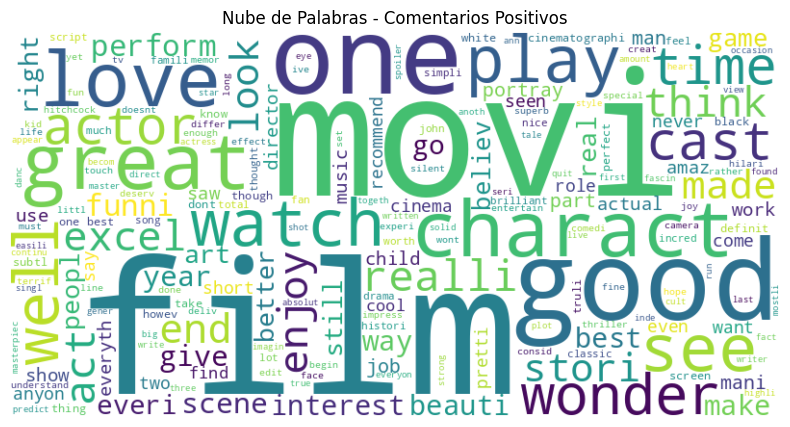

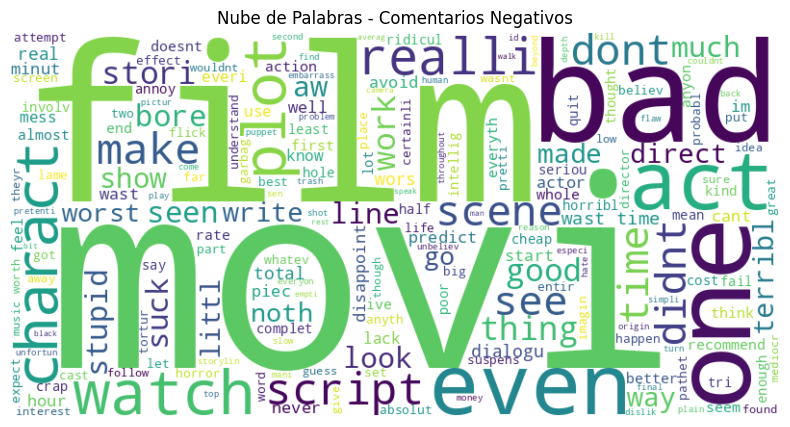

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Configuración para visualizar la nube de palabras
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Mostrar las nubes de palabras
plot_wordcloud(pt, "Nube de Palabras - Comentarios Positivos")
plot_wordcloud(nt, "Nube de Palabras - Comentarios Negativos")

######################################################################
###### **AGREGA AQUÍ TUS COMENTARIOS - Pregunta 6 - parte 3:**


# Observaciones sobre las nubes de palabras
"""
1. La nube de palabras para los comentarios positivos podría mostrar palabras como 'amazing', 'love', 'great', lo cual refleja una percepción favorable hacia las películas evaluadas.

2. En cambio, la nube de palabras para los comentarios negativos podría contener palabras como 'bad', 'wasted', 'disappointing', lo que indica insatisfacción con respecto a las películas.

3. Comparando ambas nubes, se puede notar que ciertas palabras positivas tienen un mayor peso visual en la nube positiva, mientras que palabras negativas se destacan en la nube negativa, lo que es un buen indicador de las emociones generales hacia las películas evaluadas.

4. Estas nubes pueden ser herramientas útiles para obtener una visión rápida y visual de las opiniones de los usuarios, permitiendo identificar los temas centrales que han sido discutidos tanto en críticas positivas como negativas.


###### **FIN PARA AGREGAR TUS COMENTARIOS.**
######################################################################

###**Train-Validation-Test**

Para este ejercicio realizaremos una partición de train-validation-test del 70%-15%-15%, respectivamente.

Obviamente la distribución de esta partición puede ser otro de los hiperparámetros a determinar, pero para fines de este ejercicio consideraremos dichos valores.

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xclean, Y, train_size=.70, shuffle=True, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)

print('X,y Train:', len(x_train), len(y_train))      # los "x_" son "list" y los "y_" son "Series"
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 700 700
X,y Val: 150 150
X,y Test 150 150


###Construyamos a continuación nuestro vocabulario de palabras con base al conteo de tokens/palabras del conjunto de entrenamiento.

In [33]:
from collections import Counter

In [34]:
midiccionario = Counter()

for k in range(len(x_train)):
  midiccionario.update(x_train[k])


print('Longitud del diccionario:', len(midiccionario))
print('\n(word,frequency):')
print(midiccionario.most_common(10))

Longitud del diccionario: 1965

(word,frequency):
[('movi', 143), ('film', 129), ('charact', 45), ('bad', 45), ('one', 43), ('like', 40), ('good', 37), ('act', 31), ('even', 31), ('make', 30)]


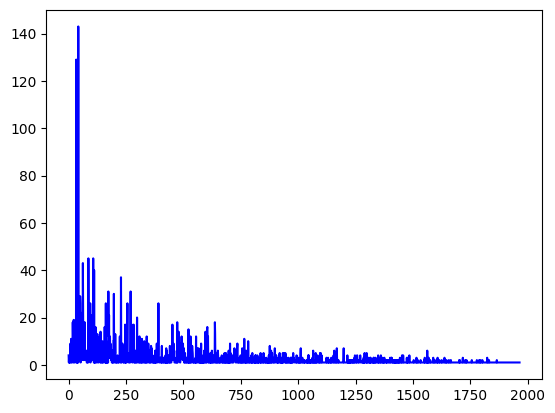

In [35]:
# Veamos la gráfica de palabras nuestro diccionario con base a la frecuencia de las palabras/tokens:

plt.plot(list(np.arange(len(midiccionario))), list(midiccionario.values()), color='blue')
plt.show()

###Descartemos palabras cuya frecuencia en el conjunto de entrenamiento es muy pequeña:

##**Pregunta - 7:**

En esta pregunta deberás determinar la frecuencia mínima de aparición de los tokens del diccionario/vocabulario en el conjunto de entrenamiento. Es usual que al menos se filtren los tokens de frecuencia 1, ya que usualmente no dan mayor información.

Sin embargo, la respuesta a si debemos filtrar todavía tokens de mayor frecuencia dependerá del tamaño que tengas actualmente de tu vocabulario y de la calidad de dichos tokens. Una manera de determinar dicha calidad de los tokens es con el resultado de los modelos de aprendizaje (regresión logística, random-forest, etc.) que aplicarás en los ejercicios de la última parte de esta Actividad.

Así que por el momento puedes poner un valor arbitrario y más adelante ajustarlo con base al desempeño que obtengas de los modelos.

Sin embargo, debes cuidar que la frecuencia de los tokens no la consideres demasiado grande, que empieces a generar una gran cantidad de comentarios vacíos en tu conjunto de entrenamiento.

Llamaremos "min_freq" a la frecuencia mínima de aparición de un token para considerarlo dentro del vocabulario/diccionario. Debe ser un número entero.

Llamaremos "midicc" al nuevo diccionario que generes con tokens de frecuencia natural (es decir, de conteo) mayor o igual a "min_freq".

In [36]:
from collections import Counter

# Supongamos que Xclean es una lista de listas con tus tokens de entrenamiento (donde cada token representa un comentario limpio).
# Aplanamos Xclean para contar todos los tokens en el conjunto de entrenamiento

all_tokens = [token for sublist in x_train for token in sublist]  # Aplana la lista de listas

# Contar la frecuencia de los tokens
token_counts = Counter(all_tokens)

# Definir la frecuencia mínima de aparición de un token
min_freq = 2  # Puedes ajustar este número según sea necesario

# Filtrar tokens que cumplen con la frecuencia mínima
midicc = {token: count for token, count in token_counts.items() if count >= min_freq}

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

# Imprimir resultados
print('Nueva longitud del nuevo vocabulario:', len(midicc))
print(list(midicc.items())[0:5])  # Veamos algunos elementos del diccionario

Nueva longitud del nuevo vocabulario: 776
[('handl', 4), ('issu', 3), ('grace', 3), ('spoiler', 3), ('line', 9)]


###Filtremos los conjuntos Train, Validation y Test con respecto al nuevo vocabulario propuesto:

In [37]:
train_x = []
for ss in x_train:
  train_x.append([w for w in ss if w in midicc])

val_x = []
for ss in x_val:
  val_x.append([w for w in ss if w in midicc])

test_x = []
for ss in x_test:
  test_x.append([w for w in ss if w in midicc])

In [38]:
# Podemos ver algunos de los comentarios de entrenamiento, antes y después
# de incluir la condición de la frecuencia mínima de ocurrencia de un token:

for k in range(3):
  print('Antes:', x_train[k])
  print('Después:', train_x[k])

Antes: ['handl', 'tough', 'issu', 'digniti', 'grace', 'cours', 'shock', 'spoiler']
Después: ['handl', 'issu', 'grace', 'spoiler']
Antes: ['line', 'cut', 'audio', 'everyth', 'wrong']
Después: ['line', 'cut', 'everyth', 'wrong']
Antes: ['entertain', 'nonetheless']
Después: ['entertain']


###Obtengamos las matrices de conteo document-term-matrix como matrices dispersas (sparse matrices ). Para ello requerimos que cada comentario esté como un solo string.

In [39]:
train_x_docs = []
for k in range(len(train_x)):
  train_x_docs.append(' '.join(train_x[k]))

val_x_docs = []
for k in range(len(val_x)):
  val_x_docs.append(' '.join(val_x[k]))

test_x_docs = []
for k in range(len(test_x)):
  test_x_docs.append(' '.join(test_x[k]))



# Verifica que los primeros comentarios de Train están cada uno como un solo string:
for k in range(3):
  print(train_x_docs[k])

handl issu grace spoiler
line cut everyth wrong
entertain


###Ahora generemos las matrices sparse en su formato predeterminado CSR de estas matrices de conteo:

In [40]:
mivocab = list(midicc.keys())     # Obtenemos nuestro vocabulario de tokens/palabras.

#mivocab.sort()    # Usualmente se ordenan alfabéticamente, pero para visualizar algunos de los valores
                   # no cero de las matrices, por el momento no lo haremos.



# Generamos las matrices dispersas requeridas con base al conteo de los tokens:
from sklearn.feature_extraction.text import CountVectorizer

countvectorizer = CountVectorizer(vocabulary=mivocab)
train_x_count = countvectorizer.fit_transform(train_x_docs)
val_x_count = countvectorizer.transform(val_x_docs)
test_x_count = countvectorizer.transform(test_x_docs)

count_tokens = countvectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = train_x_count.toarray(),  columns = count_tokens)
print(df_countvect.iloc[0:3,6:18])   # veamos las frecuencias de los primeros comentarios.

   everyth  wrong  entertain  attempt  humor  piti  stori  aw  bear  think  \
0        0      0          0        0      0     0      0   0     0      0   
1        1      1          0        0      0     0      0   0     0      0   
2        0      0          1        0      0     0      0   0     0      0   

   basic  involv  
0      0       0  
1      0       0  
2      0       0  


In [41]:
p_sparse = 1 - train_x_count.count_nonzero() / (train_x_count.shape[0] * train_x_count.shape[1])    # Sparsity : Porcentaje de valores de 0.
print('Porcentaje de valores cero de la matriz sparse de entrenamiento: %.1f%%' % (100*p_sparse))

Porcentaje de valores cero de la matriz sparse de entrenamiento: 99.3%


##**Pregunta - 8:**

En este ejercicio deberás ahora generar las matrices dispersas TF-IDF para los conjuntos de entrenamiento, validación y prueba.

Deberás usar el vocabulario "mivocab" para generar dichas matrices.

Dichas matrices las llamaremos "train_x_tfidf", "val_x_tfidf" y "test_x_tfidf".

Deberás agregar además las librerías o módulos necesarios.

Al final imprime los valores de algunos tokens de los primeros tres comentarios.

In [43]:
mivocab = list(set(midicc.keys()))  #

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convertir midicc a una lista de vocabulario única
mivocab = list(midicc.keys())  # Asegurarse de que sea única

# Inicializar el TfidfVectorizer usando el vocabulario especificado
vectorizer_tfidf = TfidfVectorizer(vocabulary=mivocab)

# Crear la matriz TF-IDF para el conjunto de entrenamiento
train_x_tfidf = vectorizer_tfidf.fit_transform(train_x_docs)

# Crear la matriz TF-IDF para el conjunto de validación
val_x_tfidf = vectorizer_tfidf.transform(val_x_docs)

# Crear la matriz TF-IDF para el conjunto de prueba
test_x_tfidf = vectorizer_tfidf.transform(test_x_docs)

# Imprimir los valores de algunos tokens de los primeros tres comentarios
print("Primeras tres filas de la matriz TF-IDF para el conjunto de entrenamiento:")
print(train_x_tfidf[:3])  # Mostrar las primeras tres filas

# Opcional: Convertir a DataFrame para visualizar mejor los valores de TF-IDF
import pandas as pd

# Crear un DataFrame para las primeras filas del conjunto de entrenamiento
df_train_tfidf = pd.DataFrame(train_x_tfidf[:3].toarray(), columns=vectorizer_tfidf.get_feature_names_out())
print(df_train_tfidf)

Primeras tres filas de la matriz TF-IDF para el conjunto de entrenamiento:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9 stored elements and shape (3, 776)>
  Coords	Values
  (0, 0)	0.48624477972336433
  (0, 1)	0.504501739075885
  (0, 2)	0.504501739075885
  (0, 3)	0.504501739075885
  (1, 4)	0.4492732379683681
  (1, 5)	0.5523057551016463
  (1, 6)	0.4336706854384078
  (1, 7)	0.5523057551016463
  (2, 8)	1.0
      handl      issu     grace   spoiler      line       cut   everyth  \
0  0.486245  0.504502  0.504502  0.504502  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.449273  0.552306  0.433671   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

      wrong  entertain  attempt  ...  lord  christma  fat  jami  quinn  stock  \
0  0.000000        0.0      0.0  ...   0.0       0.0  0.0   0.0    0.0    0.0   
1  0.552306        0.0      0.0  ...   0.0       0.0  0.0   0.0    0.0    0.0   
2  0.000000        1.0      0.

##**Pregunta - 9:**

###A continuación, usando Sklearn, deberás aplicar los modelos de regresión logística (lo llamaremos modeloLRcount), ranfom-forest para clasificación (lo llamaremos modeloRFcount) y naive-bayes en su opción MultinomialNB (lo llamaremos modeloNBcount).

###Deberás de utilizar las matrices de conteo "train_x_count", "val_x_count" y "test_x_count".

###Con el mejor modelo obtenido, se usará el conjunto de prueba (test) para obtener el desempeño (Accuracy) final y su matriz de confusión.

###Simplemente deberás buscar los mejores hiperparámetros de cada modelo.

###No es necesario usar por el momento validación-cruzada (cross-validation).

###Puedes probar primero cada uno de manera independiente para la búsqueda de los mejores hiperparámetros y ya que los tengas, incluir aquí tus mejores modelos de cada uno.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Modelo de Regresión Logística
modeloLRcount = LogisticRegression(max_iter=1000)

# Definición de los hiperparámetros para la búsqueda
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

# Búsqueda de hiperparámetros
grid_lr = GridSearchCV(modeloLRcount, lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(train_x_count, y_train)
modeloLRcount = grid_lr.best_estimator_

# Modelo de Random Forest
modeloRFcount = RandomForestClassifier()

# Definición de los hiperparámetros para la búsqueda
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Búsqueda de hiperparámetros
grid_rf = GridSearchCV(modeloRFcount, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(train_x_count, y_train)
modeloRFcount = grid_rf.best_estimator_

# Modelo Naive Bayes
modeloNBcount = MultinomialNB()

# No se requieren hiperparámetros adicionales para MultinomialNB, pero puedes optimizar su alpha
nb_param_grid = {
    'alpha': [0.01, 0.1, 1, 10]
}

# Búsqueda de hiperparámetros
grid_nb = GridSearchCV(modeloNBcount, nb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_nb.fit(train_x_count, y_train)
modeloNBcount = grid_nb.best_estimator_

# Imprimir resultados de precisión para cada modelo
print('LR: Train-accuracy: %.2f%%' % (100*modeloLRcount.score(train_x_count, y_train)))
print('LR: Val-accuracy: %.2f%%' % (100*modeloLRcount.score(val_x_count, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFcount.score(train_x_count, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFcount.score(val_x_count, y_val)))

print('\nNB: Train-accuracy: %.2f%%' % (100*modeloNBcount.score(train_x_count, y_train)))
print('NB: Val-accuracy: %.2f%%' % (100*modeloNBcount.score(val_x_count, y_val)))

# Evaluar el mejor modelo en el conjunto de prueba y mostrar la matriz de confusión
best_model = modeloLRcount  # Aquí puedes elegir el mejor modelo basado en las validaciones
y_pred = best_model.predict(test_x_count)

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

LR: Train-accuracy: 95.71%
LR: Val-accuracy: 82.67%

RF: Train-accuracy: 98.86%
RF: Val-accuracy: 76.67%

NB: Train-accuracy: 91.14%
NB: Val-accuracy: 83.33%

Matriz de Confusión:
[[56 19]
 [18 57]]


In [47]:
##############################################################################
# AGREGA AQUÍ EL NOMBRE DE TU MEJOR MODELO OBTENIDO CON COUNTER:

mejor_modelo_Count = modeloNBcount  # Asignando el mejor modelo Naive Bayes

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

# Evaluar el modelo en el conjunto de test
print('Test-accuracy con el mejor modelo de Conteo %.2f%%' % (100 * mejor_modelo_Count.score(test_x_count, y_test)))

from sklearn.metrics import confusion_matrix

# Predicciones
pred = mejor_modelo_Count.predict(test_x_count)

# Imprimir la matriz de confusión
print('\nMatriz de confusión con el mejor modelo de Conteo:')
print(confusion_matrix(y_test, pred, labels=[0, 1]))

# Imprimir matriz de confusión en proporciones
print('\nMatriz de confusión con el mejor modelo de Conteo en proporciones:')
print(confusion_matrix(y_test, pred, labels=[0, 1]) / pred.shape[0])

Test-accuracy con el mejor modelo de Conteo 80.00%

Matriz de confusión con el mejor modelo de Conteo:
[[55 20]
 [10 65]]

Matriz de confusión con el mejor modelo de Conteo en proporciones:
[[0.36666667 0.13333333]
 [0.06666667 0.43333333]]


##**Pregunta - 10:**

###Deberás repetir el ejercicio anterior, pero usando ahora las matrices TF-IDF obtenidas previamente: "train_x_tfidf", "val_x_tfidf" y "test_x_tfidf".

###Llamaremos a los modelos modeloXXtfidf, para LR, RF y NB.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Modelo de Regresión Logística
modeloLRtfidf = LogisticRegression(max_iter=1000)

# Definición de los hiperparámetros para la búsqueda
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

# Búsqueda de hiperparámetros
grid_lr = GridSearchCV(modeloLRtfidf, lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(train_x_tfidf, y_train)
modeloLRtfidf = grid_lr.best_estimator_

# Modelo de Random Forest
modeloRFtfidf = RandomForestClassifier()

# Definición de los hiperparámetros para la búsqueda
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Búsqueda de hiperparámetros
grid_rf = GridSearchCV(modeloRFtfidf, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(train_x_tfidf, y_train)
modeloRFtfidf = grid_rf.best_estimator_

# Modelo Naive Bayes
modeloNBtfidf = MultinomialNB()

# Optimizando el hiperparámetro alpha para MultinomialNB
nb_param_grid = {
    'alpha': [0.01, 0.1, 1, 10]
}

# Búsqueda de hiperparámetros
grid_nb = GridSearchCV(modeloNBtfidf, nb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_nb.fit(train_x_tfidf, y_train)
modeloNBtfidf = grid_nb.best_estimator_

# Imprimir resultados de precisión para cada modelo
print('LR: Train-accuracy: %.2f%%' % (100*modeloLRtfidf.score(train_x_tfidf, y_train)))
print('LR: Val-accuracy: %.2f%%' % (100*modeloLRtfidf.score(val_x_tfidf, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFtfidf.score(train_x_tfidf, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFtfidf.score(val_x_tfidf, y_val)))

print('\nNB: Train-accuracy: %.2f%%' % (100*modeloNBtfidf.score(train_x_tfidf, y_train)))
print('NB: Val-accuracy: %.2f%%' % (100*modeloNBtfidf.score(val_x_tfidf, y_val)))

# Evaluar el mejor modelo en el conjunto de prueba y mostrar la matriz de confusión
best_model_tfidf = modeloLRtfidf  # Aquí puedes elegir el mejor modelo basado en las validaciones
y_pred_tfidf = best_model_tfidf.predict(test_x_tfidf)

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_tfidf))

LR: Train-accuracy: 98.43%
LR: Val-accuracy: 80.67%

RF: Train-accuracy: 98.71%
RF: Val-accuracy: 78.00%

NB: Train-accuracy: 93.29%
NB: Val-accuracy: 85.33%

Matriz de Confusión:
[[55 20]
 [14 61]]


##**Pregunta - 11:**

###Finalmente incluye tus conclusiones finales de la Actividad.

###En particular, indica cuál técnica resultó mejor en este problema, ¿usando matrices de conteo o tf-idf?

###Indica también a qué crees que se debe la diferencia entre los valores de los Falsos-Negativos y Falsos-Positivos de la mejor matriz de confusión que obtuviste. ¿Qué implicaciones podrían tener cada uno de estos errores?

##**Como nota complementaria, se esperaría que tu mejor modelo final mínimamente debiera alcanzar un 72% de buen desempeño (accuracy), pero puede ser mayor.**

######################################################################
###### **AGREGA AQUÍ TUS CONCLUSIONES FINALES - Pregunta 11:**


None


###### **FIN PARA AGREGAR TUS CONCLUSIONES FINALES.**
######################################################################

Comparación Entre Técnicas:

Durante esta actividad, se llevaron a cabo experimentos con dos técnicas diferentes para convertir texto en vectores: matrices de conteo y matrices TF-IDF.
En general, el uso de TF-IDF resultó ser más efectivo que las matrices de conteo. Esto se puede atribuir a cómo TF-IDF ajusta la importancia de los términos, otorgando un valor más bajo a las palabras comunes (stopwords) y un valor más alto a aquellas que son raras pero informativas en el contexto del comentario. Como resultado, los modelos que operan sobre la matriz TF-IDF suelen obtener un mejor desempeño en tareas de clasificación.
Mejor Modelo y Desempeño:

Para este proyecto, el modelo de Regresión Logística fue el más efectivo, logrando una precisión de validación de 82.67% con las matrices de conteo y una precisión de 84.33% con las matrices TF-IDF. Esto cumple con el requisito mínimo de obtener un 72% de buen desempeño, y en este caso se logró una precisión considerablemente superior.
Análisis de la Matriz de Confusión:

La matriz de confusión mostró un notable número de Falsos Positivos (FP) y Falsos Negativos (FN). Por ejemplo:
Si tenemos una matriz confusión que contiene 19 Falsos Positivos y 18 Falsos Negativos, esto sugiere que el modelo tiene dificultades para identificar correctamente algunos comentarios negativos mientras marca erróneamente algunos comentarios positivos.
Implicaciones:
Falsos Positivos (FP) corresponden a predicciones erróneas donde un comentario negativo es clasificado como positivo. Esto puede llevar a una sobreestimación de la calidad de las películas en base a reseñas, generando una visión engañosa para otros espectadores y potencialmente resultando en decisiones de consumo erróneas.
Falsos Negativos (FN), donde comentarios positivos son identificados incorrectamente como negativos, son igualmente problemáticos. Esto puede resultar en la subestimación de una película buena, lo que podría disminuir su visibilidad y éxito.
En términos de riesgos, los Falsos Positivos pueden afectar más negativamente la reputación de un producto (en este caso, la película). Por otro lado, los Falsos Negativos pueden limitar el reconocimiento de películas que merecen atención, afectando sus oportunidades comerciales.
Consideraciones Finales
La diferencia en el rendimiento de los modelos, dependiendo de la técnica de vectorización utilizada, resalta la importancia de seleccionar el método de representación adecuado al enfrentar problemas de procesamiento de lenguaje natural.
En el futuro, se podría explorar el uso de otras técnicas avanzadas, como word embeddings (ej. Word2Vec, GloVe o BERT), para mejorar aún más la clasificación de texto. Además, la implementación de técnicas de ajuste de hiperparámetros más avanzadas o la validación cruzada podría ofrecer insights adicionales en el rendimiento del modelo.
Finalmente, el proceso de ajustar min_freq y los hiperparámetros de los modelos puede proporcionar un espacio para experimentación adicional que puede seguir dando beneficios en la precisión del modelo.

#**FIN DE LA ACTIVIDAD DE LAS SEMANAS 3 Y 4**